In [350]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Getting data

In [351]:
independent_features = ['Hour', 'Weekend','Month']
dependent_feature = 'TotalTimeStopped_p50'
data = pd.read_csv(r'C:\Programs\MyPrograms\Python\ML\3K2SML\IT\train.csv').dropna().sample(frac=0.1)
data = data[data["Month"] > 6]

train, test = train_test_split(data, test_size=0.3)
print(train.shape)
print(test.shape)

(51464, 28)
(22057, 28)


In [352]:

len(data) - len(data[data["Month"] < 6])

73521

Correlation between features

<AxesSubplot:>

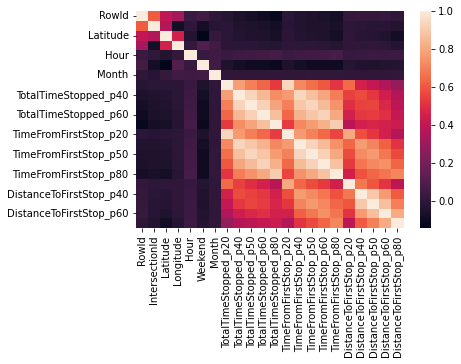

In [353]:
corr = train.corr()
sns.heatmap(corr)

Correlation between features and target variable

In [354]:
corr_with_target = train.corrwith(train[dependent_feature])
print(corr_with_target)

RowId                     -0.073587
IntersectionId            -0.054021
Latitude                  -0.042798
Longitude                 -0.015229
Hour                       0.047768
Weekend                   -0.095757
Month                      0.003433
TotalTimeStopped_p20       0.695082
TotalTimeStopped_p40       0.931143
TotalTimeStopped_p50       1.000000
TotalTimeStopped_p60       0.923359
TotalTimeStopped_p80       0.791851
TimeFromFirstStop_p20      0.695481
TimeFromFirstStop_p40      0.892746
TimeFromFirstStop_p50      0.935232
TimeFromFirstStop_p60      0.859851
TimeFromFirstStop_p80      0.745220
DistanceToFirstStop_p20    0.497545
DistanceToFirstStop_p40    0.553323
DistanceToFirstStop_p50    0.555360
DistanceToFirstStop_p60    0.473150
DistanceToFirstStop_p80    0.391267
dtype: float64


Scatter plots: feature vs. feature, feature vs. target


features = list(train)[12::2]
sns.pairplot(train[features])
plt.tight_layout()
plt.show()

features_to_plot = list(train)[12:]
target = 'TotalTimeStopped_p50'
sns.pairplot(train[features_to_plot], y_vars=dependent_feature)
plt.tight_layout()
plt.show()

Bar charts for features

<AxesSubplot:xlabel='Month', ylabel='TotalTimeStopped_p50'>

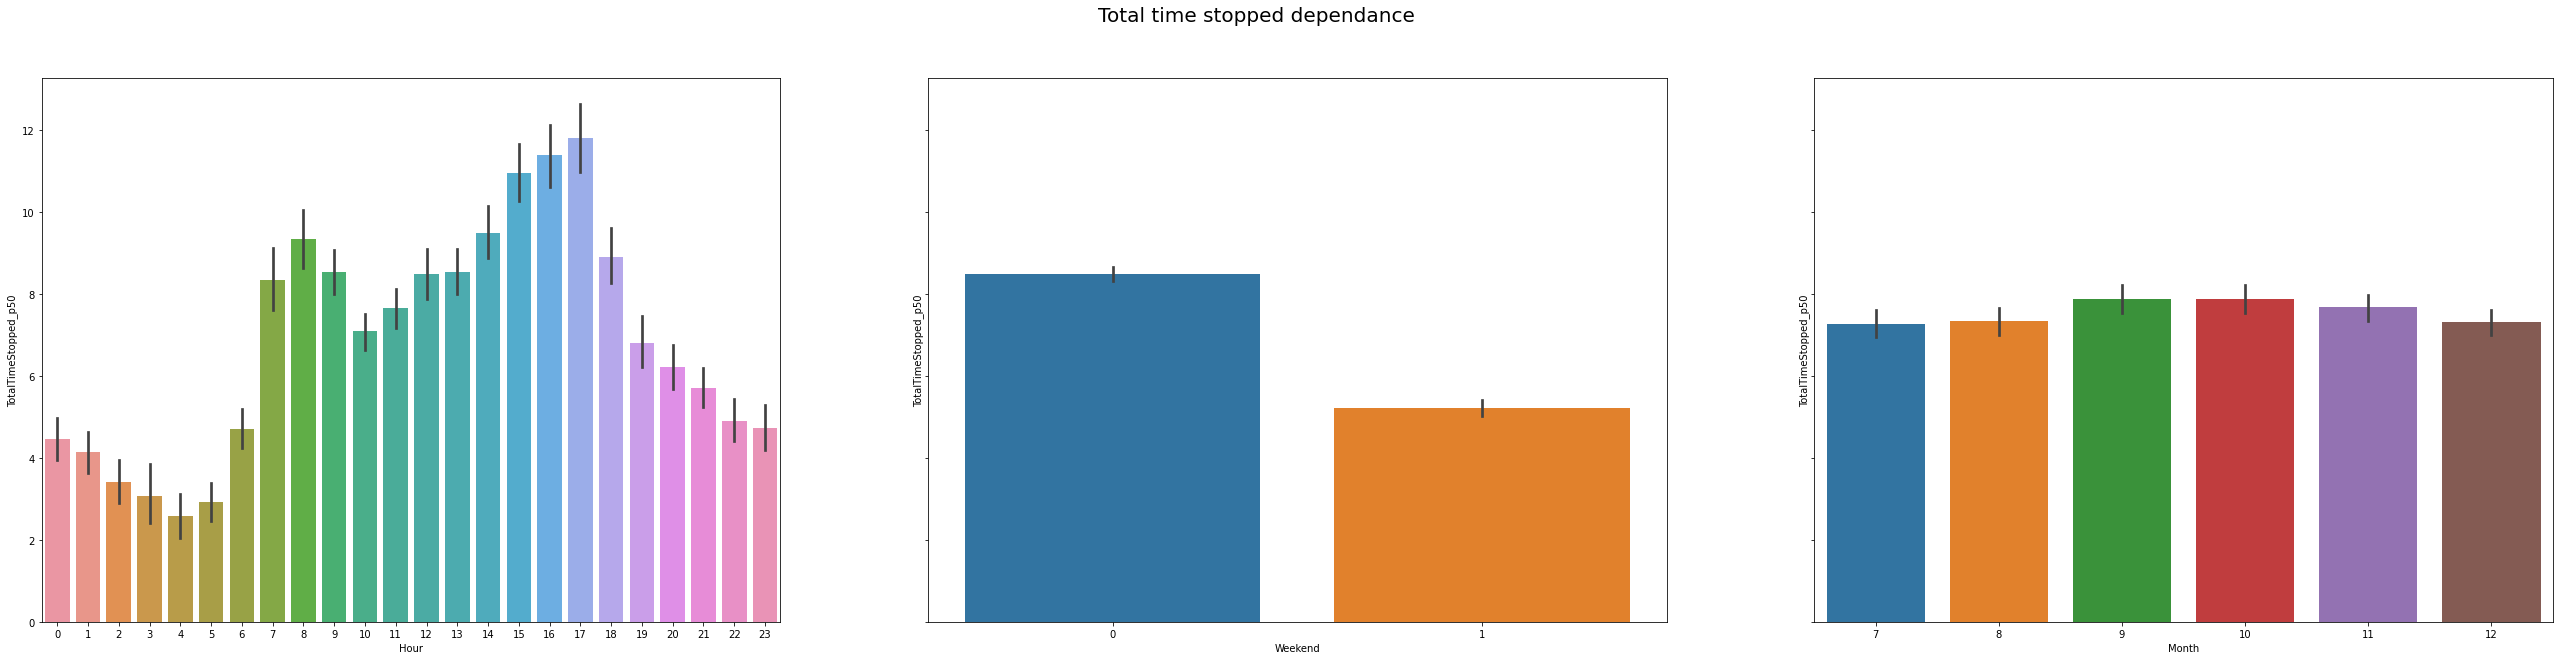

In [355]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(45,10))
fig.suptitle('Total time stopped dependance', fontsize='20')

sns.barplot(data=train, x='Hour', y=dependent_feature, ax=axes[0])
sns.barplot(data=train, x='Weekend', y=dependent_feature, ax=axes[1])
sns.barplot(data=train, x='Month', y=dependent_feature, ax=axes[2])

Custom linear regressor

In [356]:
def normalize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [357]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [358]:
def hypothesis(X, theta):
    h_theta = np.dot(X, theta)
    return h_theta

In [359]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = sum((hypothesis(X, theta) - y)**2)/(2*m)
    return J

In [360]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_theta = np.dot(hypothesis(X,theta) - y, X) / m
    return d_theta

In [361]:
def gradient_descent(X, y, theta, alpha, max_iter):
    J_history = [cost_function(X, y, theta)]
    for i in range(max_iter):
        delta = derivative(X, y, theta)
        theta = theta - alpha * delta
        J_history.append(cost_function(X, y, theta))
    return theta, J_history

In [362]:
X_train, y_train = train[independent_features].to_numpy(), train[dependent_feature].to_numpy()
X_test, y_test = test[independent_features].to_numpy(), test[dependent_feature].to_numpy()

In [363]:
X_train_normalized, mean, std = normalize(X_train)

In [364]:
X = prepare_X(X_train_normalized)

In [365]:
theta = np.array([0 for _ in range(X_train.shape[1])])

In [366]:
y = y_train[:]

In [367]:
alpha = 10**-3
max_iter = 10000

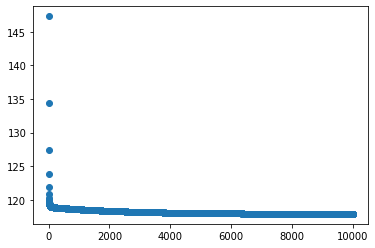

In [368]:
new_theta, Js = gradient_descent(X_train, y_train, theta, alpha, max_iter)
plt.scatter(range(len(Js)),Js)

In [369]:
print(new_theta)

[ 0.17523948 -2.79187917  0.62651118]


In [370]:
def NormalEquation(X, y):
    return np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), y))

In [371]:
NormalEquation(X_train, y_train)

array([ 0.17643671, -3.2198035 ,  0.63743208])

Sklearn LinearRegression

In [372]:
reg = LinearRegression()
reg.fit(X_train, y_train)
sklearn_theta = np.concatenate(([reg.intercept_], reg.coef_[1:]))
print(sklearn_theta)
print(cost_function(X_train, y_train, reg.coef_))

[ 6.41301808 -3.33669319  0.05429678]
137.86971612401786


Grid/Random Search

In [373]:
...

Ellipsis

Results Evaluation

In [374]:
def MAE(y_, y):
    return 1/len(y) * sum(abs(y_ - y))

In [375]:
def MSE(y_, y):
    return 1/len(y) * sum((y_ - y)**2)

In [376]:
def RMSE(y_, y):
   return np.sqrt(MSE(y_, y))

In [377]:
print(f'{MAE(hypothesis(X_train, new_theta), y_train)} vs {MAE(hypothesis(X_train, sklearn_theta), y_train)}')
print(f'{MAE(hypothesis(X_test, new_theta), y_test)} vs {MAE(hypothesis(X_test, sklearn_theta), y_test)}')


10.248604873343627 vs 73.07880294624097
10.363504679468928 vs 72.71072792702132


In [378]:
print(f'{MSE(hypothesis(X_train, new_theta), y_train)} vs {MSE(hypothesis(X_train, sklearn_theta), y_train)}')
print(f'{MSE(hypothesis(X_test, new_theta), y_test)} vs {MSE(hypothesis(X_test, sklearn_theta), y_test)}')

235.7771780553165 vs 6923.718688102368
247.46312393312346 vs 6876.853789864765
